## Different types of plots

### The box and whisker plot

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
x = st.skewnorm.rvs(10, size=1000)

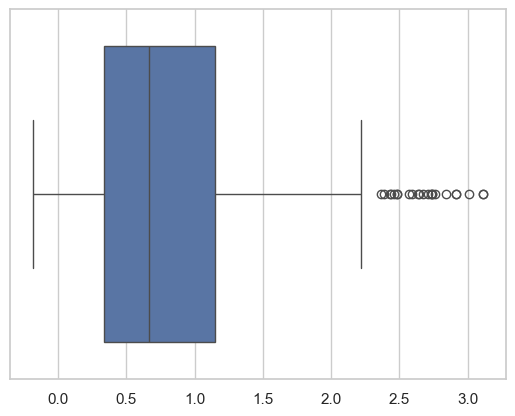

In [4]:
_ = sns.boxplot(x=x)

Box edges and median are determined by quartiles:
- centeral line in the box is the 50th percentile
- left line (left edge of the box) is the 25th percentile
- right line (right edge of the box) is the 75th percentile

In [5]:
q = np.percentile(x, [25, 50, 75])
q

array([0.33810474, 0.66560703, 1.14697755])

Bix edges define the **inter-quartile range** IQR

In [6]:
iqr = q[2] - q[0]
iqr

np.float64(0.8088728107569776)

Whisker length are determined by the furthest data points within $1.5 \times \text {IQR}$ of the box egdes

$$\text {lower fence} = Q1 - 1.5 \times (IQR)$$
$$\text {upper fence} = Q3 + 1.5 \times (IQR)$$

In [7]:
lower_fence = q[0] - 1.5 * iqr
upper_fence = q[2] + 1.5 * iqr
lower_fence, upper_fence

(np.float64(-0.8752044785079613), np.float64(2.360286764519949))

There are several (23) values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

In [8]:
x.sort()

In [12]:
x[-25:]

array([2.20971116, 2.21587517, 2.36636058, 2.38624421, 2.42800664,
       2.43770162, 2.4614332 , 2.48006308, 2.48189706, 2.56657582,
       2.59065119, 2.63537009, 2.64616318, 2.67408183, 2.71183636,
       2.72935434, 2.73561424, 2.74043451, 2.75911663, 2.83739078,
       2.91066124, 2.91721975, 3.00683304, 3.11137402, 3.11490731])

The 2nd values is the largest within the upper whisker's maximum reach and so the upper whisker is plotted there.

Useful for examining distributions on their own, box-and-whisker plots are especially helpful for comparing distributions:

In [13]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


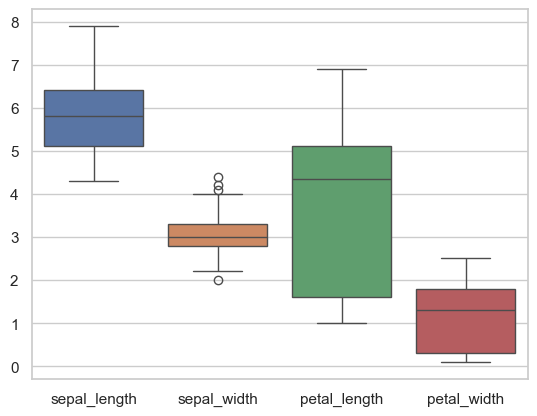

In [14]:
_ = sns.boxplot(data=iris)

In [15]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


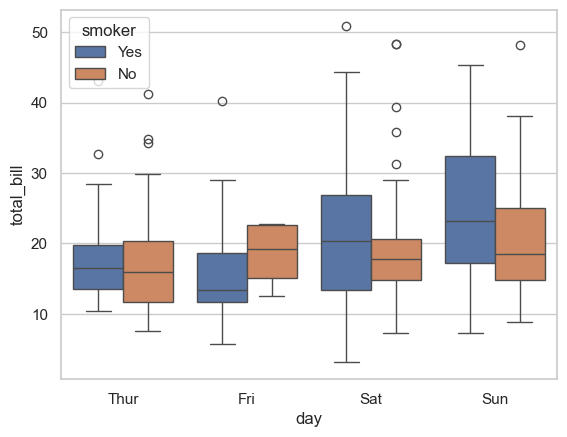

In [16]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)